In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [19]:
data=pd.read_csv('C:/Users/ofbac/OneDrive/Desktop/League Machine Learning Model/Complete Dataset.csv')

X=data[['Red_Top_WR','Red_Top_ChampXP','Red_Top_ChampWR','Red_JG_WR','Red_JG_ChampXP','Red_JG_ChampWR','Red_Mid_WR','Red_Mid_ChampXP','Red_Mid_ChampWR','Red_ADC_WR','Red_ADC_ChampXP','Red_ADC_ChampWR','Red_SUP_WR','Red_SUP_ChampXP','Red_SUP_ChampWR','Blue_TOP_WR','Blue_TOP_ChampXP','Blue_TOP_ChampWR','Blue_JG_WR','Blue_JG_ChampXP','Blue_JG_ChampWR','Blue_Mid_WR','Blue_Mid_ChampXP','Blue_Mid_ChampWR','Blue_ADC_WR','Blue_ADC_ChampXP','Blue_ADC_ChampWR','Blue_SUP_WR','Blue_SUP_ChampXP','Blue_SUP_ChampWR']]
y=data['Winning_Team']

In [20]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [68]:
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.12,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [69]:
model.fit(X_train,y_train)

preds = model.predict(X_test)

[00:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ofbac\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [70]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.675278


In [71]:
params = {"objective":'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[00:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [87]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

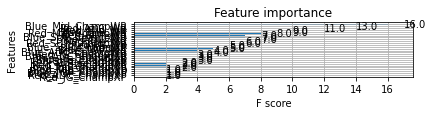

In [90]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 1]
plt.show()

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, reg_pred))
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, dtc_pred))
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, rfc_pred))
print("Support Vector Accuracy:",metrics.accuracy_score(y_test, svc_pred))
print("Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print("Gaussian Naive Bayes Accuracy:",metrics.accuracy_score(y_test, gnb_pred))

c:\users\ofbac\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.516
Decision Tree Accuracy: 0.528
Random Forest Accuracy: 0.612
Support Vector Accuracy: 0.564
Nearest Neighbor Accuracy: 0.54
Gaussian Naive Bayes Accuracy: 0.544


In [106]:
param = {'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 7,
 'reg_lambda': 25,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [107]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

c:\users\ofbac\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [117]:
grid_cv.best_score_

0.6984136325996229

In [105]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 7,
 'reg_lambda': 25,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [115]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 7,
 'reg_lambda': 25,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [111]:
final_model = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

In [118]:
from sklearn.metrics import roc_auc_score

_ = final_model.fit(X_train, y_train)

preds = final_model.predict(X_test)

[00:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ofbac\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [119]:
print('Accuracy: '+str(np.sqrt(metrics.mean_squared_error(y_test, preds))))

Accuracy: 0.6196773353931867
